In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Анализ данных авиакомпаний

Начнём с загрузки данных и вывода базовой информации

In [153]:
# Загрузка данных из файлов
flights_df = pd.read_csv('flights.csv',low_memory=False)
airlines_df = pd.read_csv('airlines.csv')
airports_df = pd.read_csv('airports.csv')

# Вывод первых нескольких строк для каждого датафрейма
print("Первые строки датафрейма flights_df:")
print(flights_df.head())

print("\nПервые строки датафрейма airlines_df:")
print(airlines_df.head())

print("\nПервые строки датафрейма airports_df:")
print(airports_df.head())




Первые строки датафрейма flights_df:
   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            ANC                 SEA                    5  ...         408.0   
1            LAX                 PBI                   10  ...         741.0   
2            SFO                 CLT                   20  ...         811.0   
3            LAX                 MIA                   20  ...         756.0   
4            SEA                 ANC                   25  ...         259.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REA

In [104]:
flights_df.head().T

,0,1,2,3,4
YEAR,2015,2015,2015,2015,2015
MONTH,1,1,1,1,1
DAY,1,1,1,1,1
DAY_OF_WEEK,3,3,3,3,3
AIRLINE,AS,AA,US,AA,AS
FLIGHT_NUMBER,98,2336,840,258,135
TAIL_NUMBER,N407AS,N3KUAA,N171US,N3HYAA,N527AS
ORIGIN_AIRPORT,ANC,LAX,SFO,LAX,SEA
DESTINATION_AIRPORT,SEA,PBI,CLT,MIA,ANC
SCHEDULED_DEPARTURE,5,10,20,20,25


In [154]:
flights_df.shape

(5819079, 31)

In [155]:
flights_df.index

RangeIndex(start=0, stop=5819079, step=1)

In [156]:
flights_df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [31]:
flights_df['AIRLINE'].unique()

14

In [157]:
flights_df.nunique()

YEAR                      1
MONTH                    12
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6952
TAIL_NUMBER            4897
ORIGIN_AIRPORT          628
DESTINATION_AIRPORT     629
SCHEDULED_DEPARTURE    1321
DEPARTURE_TIME         1440
DEPARTURE_DELAY        1217
TAXI_OUT                184
WHEELS_OFF             1440
SCHEDULED_TIME          550
ELAPSED_TIME            712
AIR_TIME                675
DISTANCE               1363
WHEELS_ON              1440
TAXI_IN                 185
SCHEDULED_ARRIVAL      1435
ARRIVAL_TIME           1440
ARRIVAL_DELAY          1240
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       4
AIR_SYSTEM_DELAY        570
SECURITY_DELAY          154
AIRLINE_DELAY          1067
LATE_AIRCRAFT_DELAY     695
WEATHER_DELAY           632
dtype: int64

In [33]:
flights_df.count()

YEAR                   5819079
MONTH                  5819079
DAY                    5819079
DAY_OF_WEEK            5819079
AIRLINE                5819079
FLIGHT_NUMBER          5819079
TAIL_NUMBER            5804358
ORIGIN_AIRPORT         5819079
DESTINATION_AIRPORT    5819079
SCHEDULED_DEPARTURE    5819079
DEPARTURE_TIME         5732926
DEPARTURE_DELAY        5732926
TAXI_OUT               5730032
WHEELS_OFF             5730032
SCHEDULED_TIME         5819073
ELAPSED_TIME           5714008
AIR_TIME               5714008
DISTANCE               5819079
WHEELS_ON              5726566
TAXI_IN                5726566
SCHEDULED_ARRIVAL      5819079
ARRIVAL_TIME           5726566
ARRIVAL_DELAY          5714008
DIVERTED               5819079
CANCELLED              5819079
CANCELLATION_REASON      89884
AIR_SYSTEM_DELAY       1063439
SECURITY_DELAY         1063439
AIRLINE_DELAY          1063439
LATE_AIRCRAFT_DELAY    1063439
WEATHER_DELAY          1063439
dtype: int64

In [158]:
flights_df['MONTH'].value_counts()

MONTH
7     520718
8     510536
3     504312
6     503897
5     496993
10    486165
4     485151
12    479230
1     469968
11    467972
9     464946
2     429191
Name: count, dtype: int64

In [159]:
flights_df.info


<bound method DataFrame.info of          YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0        2015      1    1            4      AS             98      N407AS   
1        2015      1    1            4      AA           2336      N3KUAA   
2        2015      1    1            4      US            840      N171US   
3        2015      1    1            4      AA            258      N3HYAA   
4        2015      1    1            4      AS            135      N527AS   
...       ...    ...  ...          ...     ...            ...         ...   
5819074  2015     12   31            4      B6            688      N657JB   
5819075  2015     12   31            4      B6            745      N828JB   
5819076  2015     12   31            4      B6           1503      N913JB   
5819077  2015     12   31            4      B6            333      N527JB   
5819078  2015     12   31            4      B6            839      N534JB   

        ORIGIN_AIRPORT DESTINATION_AIRPORT 

Первое, что приходит на ум - это посмотреть в какой аэропорте наибольшее число системных задержек

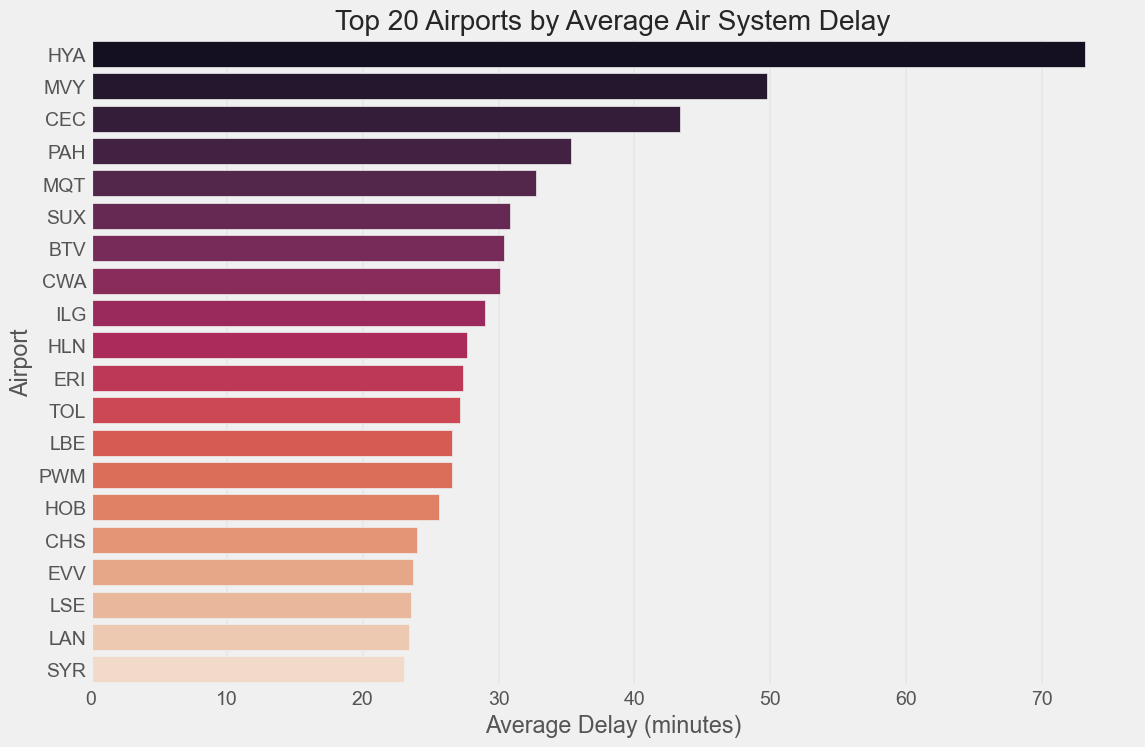

In [160]:
# Установка стиля графика
#sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')

# Создание графика для топ 20 аэропортов с наибольшим средним временем задержки в системе воздушного пространства
plt.figure(figsize=(12, 8))
sns.barplot(x=airport_delays.values, y=airport_delays.index,palette = 'rocket')
plt.title('Top 20 Airports by Average Air System Delay')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Airport')
plt.grid(axis="x", lw=0.3)
plt.show()

 Видим, что нибольшие задержки такого рода возникают в аэропорту HYA

In [161]:
# Фильтрация данных по аэропортам с кодами из трех символов
flights_df = flights_df.loc[(flights_df.ORIGIN_AIRPORT.str.len() == 3) & (flights_df.DESTINATION_AIRPORT.str.len() == 3)]

# Группировка данных по аэропортам и вычисление средней задержки
airport_delay_means = flights_df.groupby('ORIGIN_AIRPORT')['AIR_SYSTEM_DELAY'].mean()

# Сортировка результатов по убыванию средней задержки
airport_delay_means_sorted = airport_delay_means.sort_values(ascending=False)

# Вывод аэропортов с наибольшими средними задержками
print("Аэропорты с наибольшими средними задержками:")
print(airport_delay_means_sorted.head(10))


Аэропорты с наибольшими средними задержками:
ORIGIN_AIRPORT
HYA    73.187500
MVY    49.745098
CEC    43.357143
PAH    35.329412
MQT    32.719298
SUX    30.854701
BTV    30.395082
CWA    30.074890
ILG    29.000000
HLN    27.676471
Name: AIR_SYSTEM_DELAY, dtype: float64


### Топ 3 составляют
HYA (Hyannis Airport) - средняя задержка 73.19 минут

MVY (Martha's Vineyard Airport) - средняя задержка 49.75 минут

CEC (Jack Mc Namara Field Airport) - средняя задержка 43.36 минут

Попытаеся посмотреть разные данные на разных графиках и попытаться за что-то зацепиться

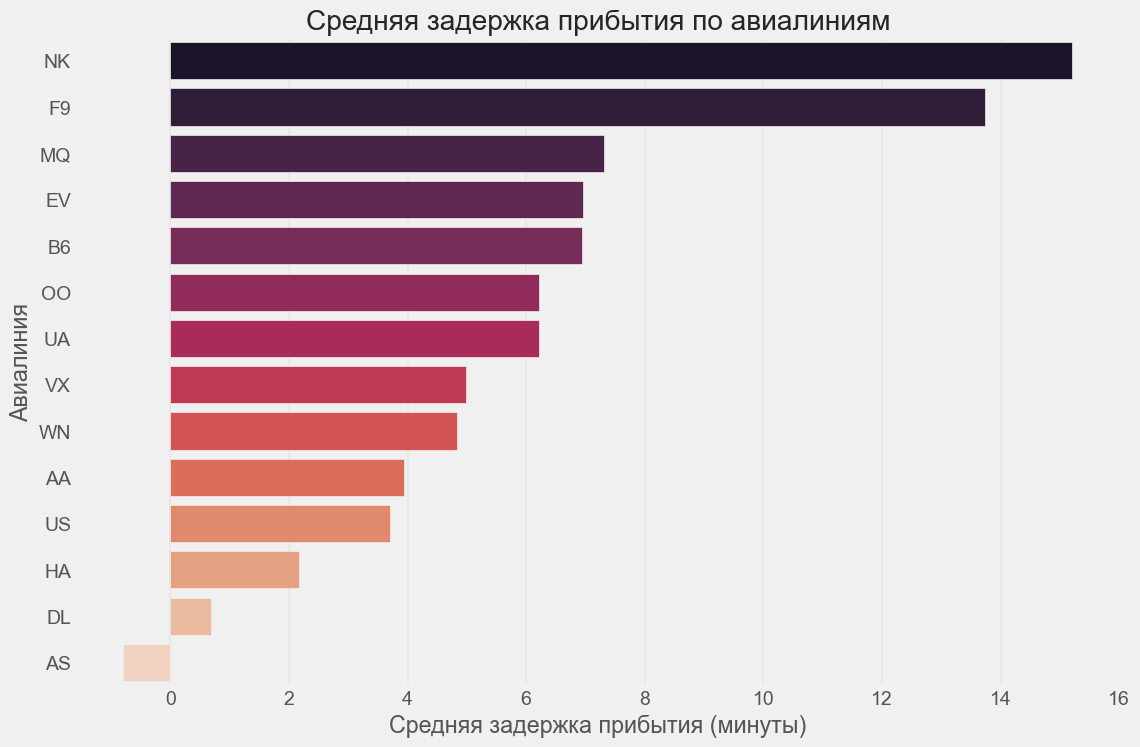

In [169]:
# Фильтрация данных о рейсах, чтобы исключить отмененные рейсы
flights_df = flights_df[flights_df['CANCELLED'] == 0]

# Сгруппировать данные по авиалиниям и вычислить среднюю задержку
airline_delays = flights_df.groupby('AIRLINE')['ARRIVAL_DELAY'].mean().sort_values(ascending=False)


plt.style.use('fivethirtyeight')
# Визуализация средней задержки для каждой авиалинии
plt.figure(figsize=(12, 8))
sns.barplot(x=airline_delays.values, y=airline_delays.index, palette = 'rocket')
plt.title('Средняя задержка прибытия по авиалиниям')
plt.xlabel('Средняя задержка прибытия (минуты)')
plt.ylabel('Авиалиния')
plt.grid(axis="x", lw=0.3)
plt.show()



In [168]:
# Вывод списка авиалиний с наибольшей средней задержкой
print("Авиалинии с наибольшей средней задержкой:")
print(airline_delays)


Авиалинии с наибольшей средней задержкой:
AIRLINE
NK    15.210786
F9    13.729468
MQ     7.316540
EV     6.964550
B6     6.949339
OO     6.221438
UA     6.211316
VX     4.979539
WN     4.837831
AA     3.935214
US     3.706209
HA     2.161856
DL     0.680265
AS    -0.791409
Name: ARRIVAL_DELAY, dtype: float64


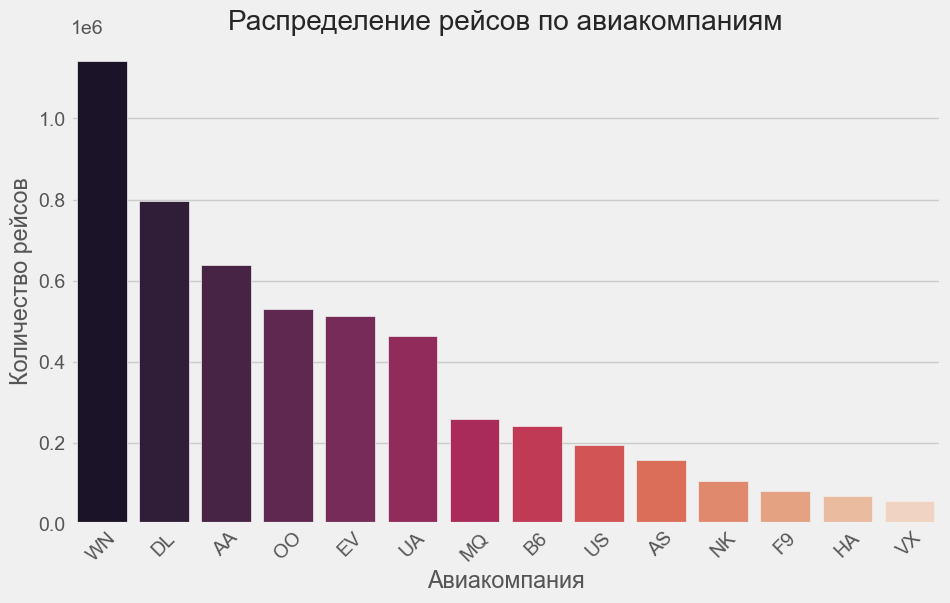

In [165]:
# Распределение рейсов по авиакомпаниям
airline_counts = flights_df['AIRLINE'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=airline_counts.index, y=airline_counts.values, palette = 'rocket')
plt.title('Распределение рейсов по авиакомпаниям')
plt.xlabel('Авиакомпания')
plt.ylabel('Количество рейсов')
plt.xticks(rotation=45)
plt.show()





/var/folders/yr/48tl3vhx1jddgf4kysqh45y80000gn/T/ipykernel_12564/2314642831.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=mean_departure_delay.index, y=mean_departure_delay.values, marker='o', palette = 'rocket')


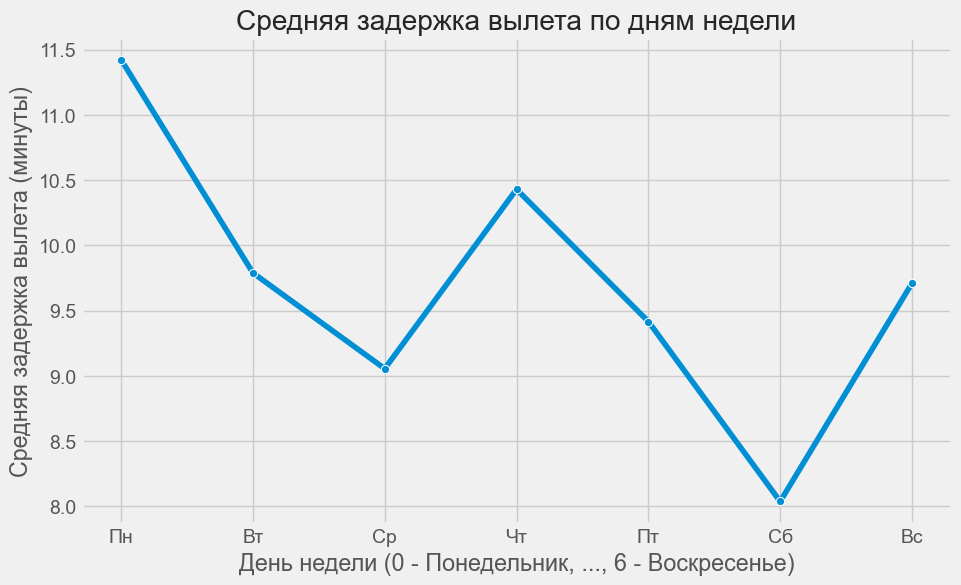

In [152]:

# Средняя задержка вылета по дням недели
flights_df['DAY_OF_WEEK'] = pd.to_datetime(flights_df[['YEAR', 'MONTH', 'DAY']]).dt.dayofweek
mean_departure_delay = flights_df.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=mean_departure_delay.index, y=mean_departure_delay.values, marker='o', palette = 'rocket')
plt.title('Средняя задержка вылета по дням недели')
plt.xlabel('День недели (0 - Понедельник, ..., 6 - Воскресенье)')
plt.ylabel('Средняя задержка вылета (минуты)')
plt.xticks(range(7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.grid(True)
plt.show()

Ожидаемо что средняя задержка по вылетам будет в понедельник, но нужно больше анализа, чтобы понять почему так проиходит, хотя есть теория, что люди в воскресенье более ленивые), а в понедельник все собираются на работу

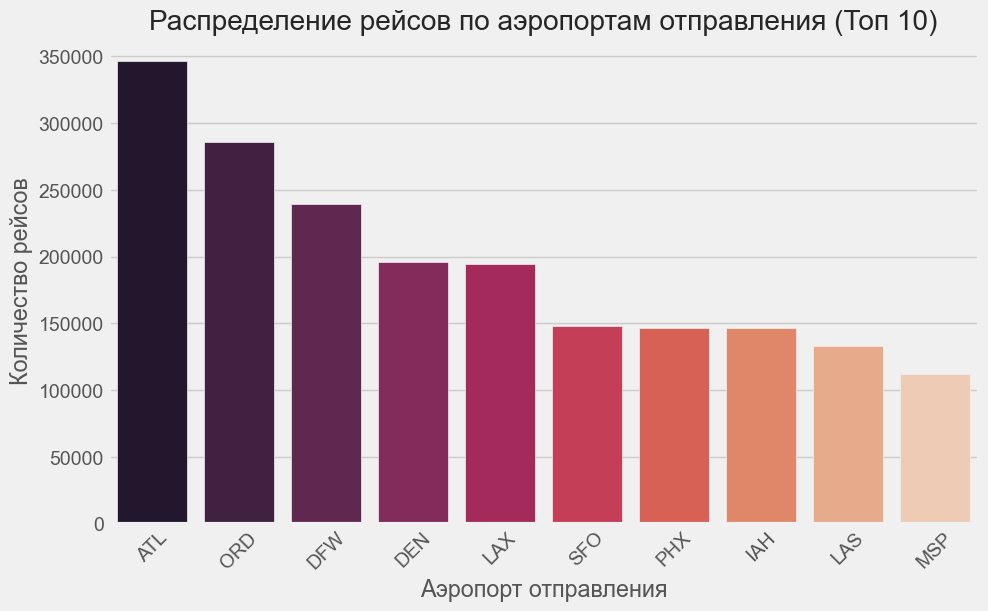

In [143]:
# Распределение рейсов по аэропортам отправления
origin_counts = flights_df['ORIGIN_AIRPORT'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=origin_counts.index, y=origin_counts.values, palette = 'rocket')
plt.title('Распределение рейсов по аэропортам отправления (Топ 10)')
plt.xlabel('Аэропорт отправления')
plt.ylabel('Количество рейсов')
plt.xticks(rotation=45)
plt.show()


Огромное количество рейстов исходит из аэропорта ATL, хочется сразу же посмотреть на статистике задержанных рейсов из кажого аэропорта

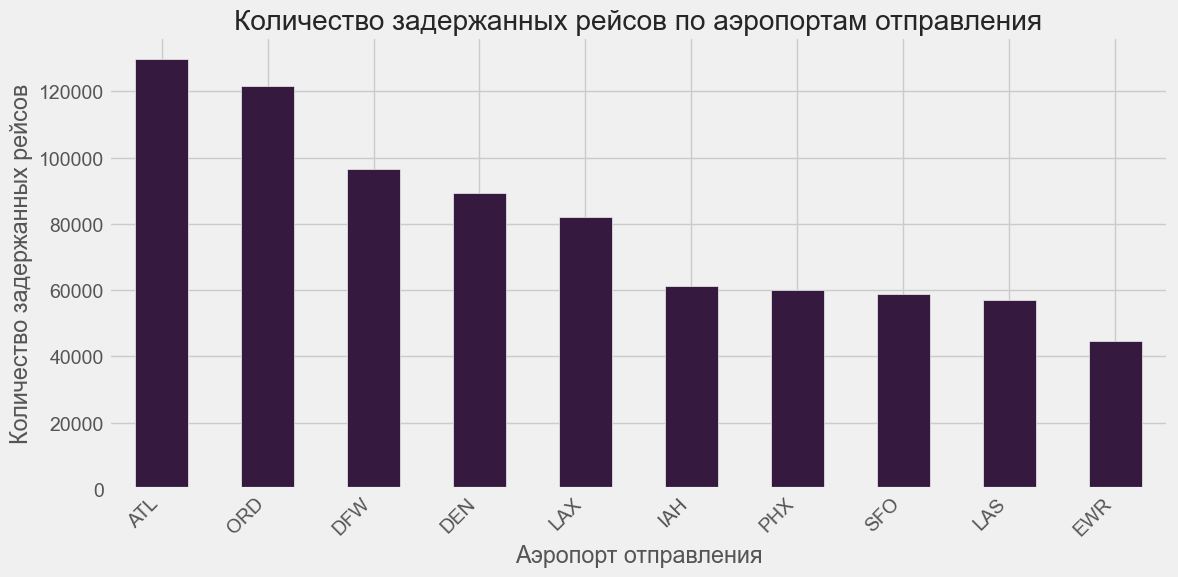

In [181]:

# Фильтрация задержанных рейсов
delayed_flights = flights_df[flights_df['DEPARTURE_DELAY'] > 0]

# Группировка данных по аэропортам отправления и подсчет количества задержанных рейсов
delayed_flight_count_per_airport = delayed_flights['ORIGIN_AIRPORT'].value_counts().sort_values(ascending=False)

# Отображение первых 10 аэропортов с наибольшим количеством задержанных рейсов
top_delayed_airports = delayed_flight_count_per_airport.head(10)
sns.set_palette('rocket')

# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
top_delayed_airports.plot(kind='bar')
plt.title('Количество задержанных рейсов по аэропортам отправления')
plt.xlabel('Аэропорт отправления')
plt.ylabel('Количество задержанных рейсов')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Также аэропорт ATL, является лидером по количеству задержанных рейсов, то есть время задержек  намного больше чем в остальных аэропортах, учитываю это возможно стоит задуматься об изменениях в аэропорте ATL, так как маршруты в этот аэропорт востребованы

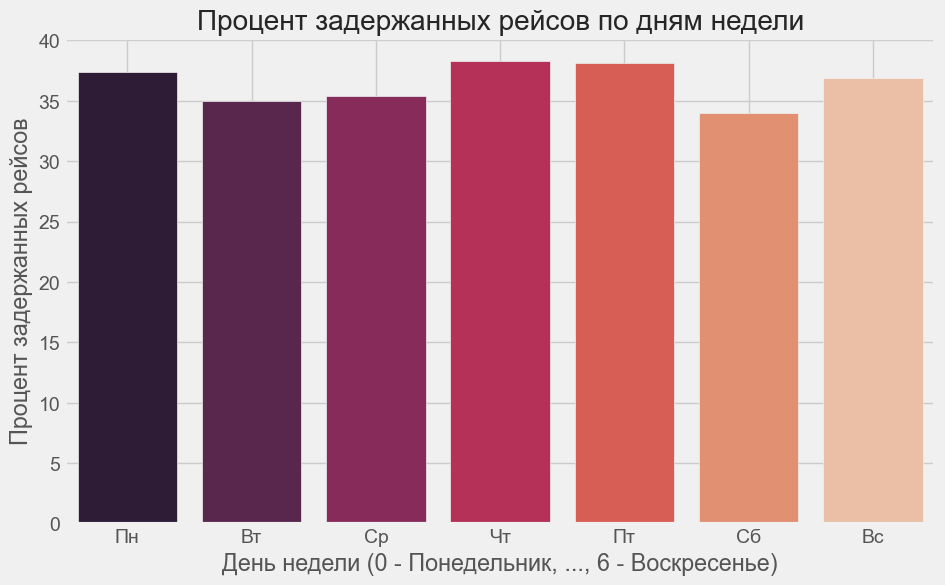

In [178]:

# Преобразование столбца DAY_OF_WEEK к типу datetime
flights_df['DAY_OF_WEEK'] = pd.to_datetime(flights_df[['YEAR', 'MONTH', 'DAY']]).dt.dayofweek
# Создание нового столбца, содержащего индикатор задержки (1 - задержка, 0 - без задержки)
flights_df['DELAYED'] = flights_df['DEPARTURE_DELAY'].apply(lambda x: 1 if x > 0 else 0)

# Группировка данных по дню недели и подсчет процента задержанных рейсов
delay_percentage = flights_df.groupby('DAY_OF_WEEK')['DELAYED'].mean() * 100

# Визуализация процента задержанных рейсов
plt.figure(figsize=(10, 6))
sns.barplot(x=delay_percentage.index, y=delay_percentage.values, palette = 'rocket')
plt.title('Процент задержанных рейсов по дням недели')
plt.xlabel('День недели (0 - Понедельник, ..., 6 - Воскресенье)')
plt.ylabel('Процент задержанных рейсов')
plt.xticks(range(7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.grid(True)
plt.show()

Рапсределение рейсов по дням практически равномерное. Отсюда никак нельзя сделать вывод о причинах задержек или отмен рейсов. Можно только заметить, что задержки рейсов в понедельник немного выше чем в остальные дни, что ожидаемо


/var/folders/yr/48tl3vhx1jddgf4kysqh45y80000gn/T/ipykernel_12564/2891660661.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_df = pd.read_csv('flights.csv')


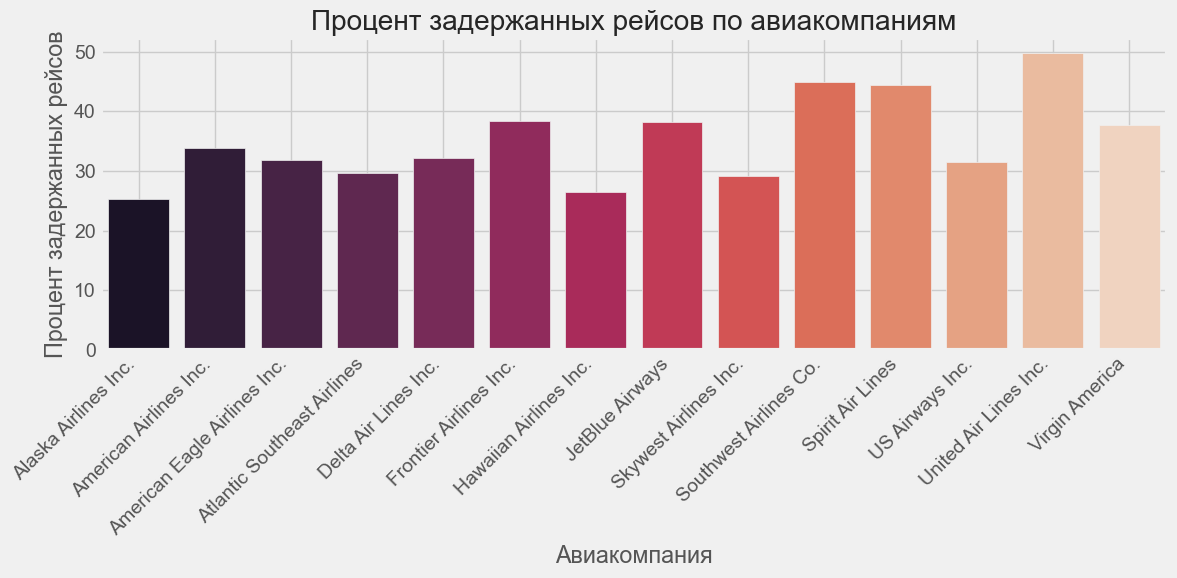

In [142]:

# Загрузка данных
flights_df = pd.read_csv('flights.csv')
airlines_df = pd.read_csv('airlines.csv')

# Присоединение названий авиакомпаний к основному датафрейму
flights_df = flights_df.merge(airlines_df, left_on='AIRLINE', right_on='IATA_CODE', how='left')


# Поправим название столбца
flights_df['DELAYED'] = flights_df['DEPARTURE_DELAY'].apply(lambda x: 1 if x > 0 else 0)

# Группировка данных по авиакомпаниям и подсчет процента задержанных рейсов
delay_percentage = flights_df.groupby('AIRLINE_y')['DELAYED'].mean() * 100

# Визуализация процента задержанных рейсов по авиакомпаниям
plt.figure(figsize=(12, 6))
sns.barplot(x=delay_percentage.index, y=delay_percentage.values, palette = 'rocket')
plt.title('Процент задержанных рейсов по авиакомпаниям')
plt.xlabel('Авиакомпания')
plt.ylabel('Процент задержанных рейсов')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


Как мы видим из графика, проблемы могут наблюдаться у отдельных авиакомпаний в частности. Поэтому разумно проводить анализ отдельных проблем отдельных компаний в сравнении со средними показателями других. И уже исходя из такого рода аналитики, делать выводы. К примеру, Spirit Air Lines имеет очень малую долю перелётов на рынке авиакомпаний, но показатели задержек одни из самых высоких. Возможно стоит именно анализировать эту проблему

In [184]:
spirit_flights = flights_df[flights_df['AIRLINE'] == 'NK']

# Общее количество рейсов Spirit Airlines
total_spirit_flights = len(spirit_flights)

# Количество задержанных рейсов Spirit Airlines
delayed_spirit_flights = spirit_flights[spirit_flights['DEPARTURE_DELAY'] > 0]
total_delayed_spirit_flights = len(delayed_spirit_flights)

# Процент задержек рейсов Spirit Airlines
delay_percentage_spirit = (total_delayed_spirit_flights / total_spirit_flights) * 100

print("Общее количество рейсов Spirit Airlines:", total_spirit_flights)
print("Количество задержанных рейсов Spirit Airlines:", total_delayed_spirit_flights)
print("Процент задержек рейсов Spirit Airlines:", delay_percentage_spirit)


Общее количество рейсов Spirit Airlines: 117379
Количество задержанных рейсов Spirit Airlines: 52089
Процент задержек рейсов Spirit Airlines: 44.37676245324973


In [185]:
spirit_airlines_data = flights_df[flights_df['AIRLINE'] == 'NK']

average_delay = spirit_airlines_data['DEPARTURE_DELAY'].mean()

print("Средняя задержка вылета рейсов Spirit Airlines:", average_delay)


Средняя задержка вылета рейсов Spirit Airlines: 15.944765880783688


In [188]:
# Выбор данных для всех авиакомпаний, кроме Spirit Airlines
other_airlines_data = flights_df[flights_df['AIRLINE'] != 'NK']

flight_counts = other_airlines_data['AIRLINE'].value_counts()
delayed_flight_counts = other_airlines_data[other_airlines_data['DEPARTURE_DELAY'] > 0]['AIRLINE'].value_counts()

# Вычисление процента задержек рейсов для каждой авиакомпании
delay_percentages = (delayed_flight_counts / flight_counts) * 100

# Вычисление среднего процента задержек рейсов для всех авиакомпаний, кроме Spirit Airlines
average_delay_percentage = delay_percentages.mean()

print("Средний процент задержек рейсов других авиакомпаний (кроме Spirit Airlines):", average_delay_percentage)


Средний процент задержек рейсов других авиакомпаний (кроме Spirit Airlines): 34.53926581179338


Среднее процент зедержек рейсов Spiris Airlinex, выше чем у остальных компаний 44.3% против 35.5%

Средний показатель задержек Spirit Airlines, выше, чем у кункурентов, возможно это связано небольшой долей этой компании на рынке авиаперелётов

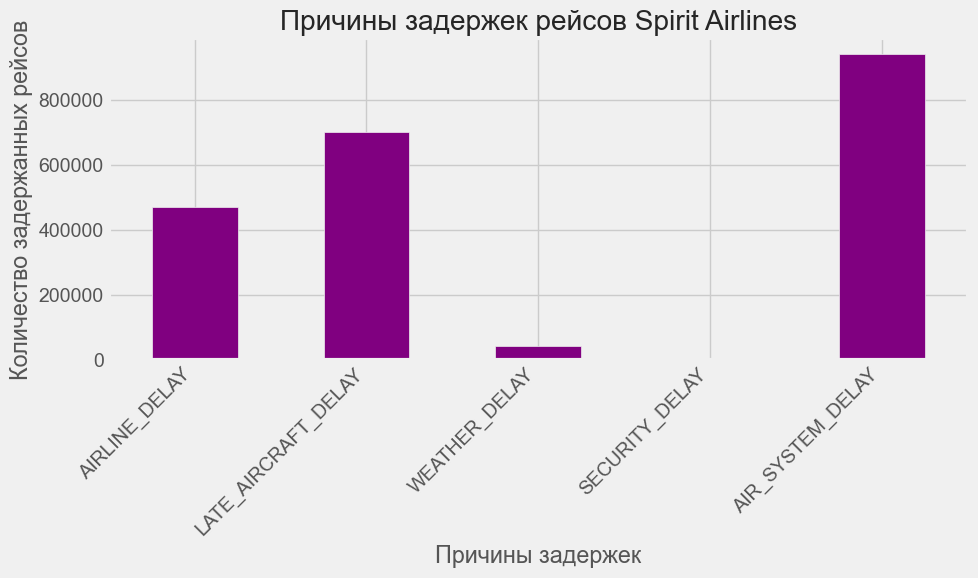

In [196]:
spirit_airlines_data = flights_df[flights_df['AIRLINE'] == 'NK']

# Подсчитать количество задержанных рейсов для каждой причины задержки
delay_reason_counts = spirit_airlines_data[['AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIR_SYSTEM_DELAY']].sum()

# Визуализировать результаты
plt.figure(figsize=(10, 6))
delay_reason_counts.plot(kind='bar', color='purple')
plt.title('Причины задержек рейсов Spirit Airlines')
plt.xlabel('Причины задержек')
plt.ylabel('Количество задержанных рейсов')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Мы видим, что примерно 46000 приходится на airline_delay, 70000 на late_aircraft_delay, 3000 на weather_delay, 100000 на air_system_delay


 AIR_SYSTEM_DELAY составили около 100000 задержанных рейсов. Это может быть связано с перегруженностью воздушного пространства, техническими сбоями в системе управления полетами или другими проблемами, связанными с организацией воздушного движения.
Задержки рейсов Spirit Airlines связаны с  различными факторами, такими как проблемы самой авиакомпании, технические проблемы с самолетами,  сбоями в системе управления воздушным движением и в меньшей мер с погодными условиями. Управления этими аспектами может помочь улучшить ситуацию с количеством задержанных рейсов